In [1]:
import pandas as pd

def month_info(csv):
    monthYear = [char for char in f'{csv}' if char.isdigit()]
    puzzle_rush = pd.read_csv(csv)
    
    puzzle_rush.columns = ['Timestamp', 'Mode', 'Score', 'TimeLeft', 'Errors']
    total_attempts = puzzle_rush['Timestamp'].count()
    
    mean_score = puzzle_rush['Score'].mean()
    mean_error = puzzle_rush['Errors'].mean()
    mean_time = puzzle_rush['TimeLeft'].mean()
    
    below_15_score = len(puzzle_rush[puzzle_rush['Score'] < 15]) / total_attempts * 100
    zero_error = len(puzzle_rush[puzzle_rush['Errors'] == 0]) / total_attempts * 100
    zero_time = len(puzzle_rush[puzzle_rush['TimeLeft'] == 0]) / total_attempts * 100
    
    all_stat = ["".join(monthYear), total_attempts, f'{mean_score:.2f}', f'{mean_error:.2f}', f'{mean_time:.2f}', f'{below_15_score:.2f} %', f'{zero_error:.2f} %', f'{zero_time:.2f} %']
    
    return all_stat

In [4]:
import os

path = 'data/csvs/'
extension = '.csv'

files = [file for file in os.listdir(path) if file.endswith(extension)]

stat = []

for file in files:
    output = month_info(path + file)
    stat.append(output)
    
stat_df = pd.DataFrame(stat)
stat_df.columns = ['YearMonth', 'Attempts', 'Mean Score', 'Mean Error', 'Mean Time', '< 15', 'No error', 'No time']

stat_df.sort_values(by='YearMonth', inplace=True)

stat_df.head()

,YearMonth,Attempts,Mean Score,Mean Error,Mean Time,< 15,No error,No time
2,202503,73,16.95,2.26,20.86,21.92 %,5.48 %,52.05 %
0,202504,79,17.35,2.34,23.91,17.72 %,3.80 %,39.24 %
1,202505,88,17.30,2.36,18.07,9.09 %,4.55 %,52.27 %


I want a BIG plot for all attempts.  

In [86]:
dfs = []

for file in files:
    df = pd.read_csv(os.path.join(path, file), header=None)
    dfs.append(df)

all_puzzle_rush = pd.concat(dfs)

In [87]:
all_puzzle_rush.columns = ['Timestamp', 'Mode', 'Score', 'TimeLeft', 'Errors']
all_puzzle_rush.sort_values(by='Timestamp', inplace=True)

all_puzzle_rush = all_puzzle_rush.assign(MonthYear = all_puzzle_rush['Timestamp'].str[:7])

all_puzzle_rush.head()

,Timestamp,Mode,Score,TimeLeft,Errors,MonthYear
0,2025-03-03 10:35:31,3,20,9,3,2025-03
1,2025-03-03 10:41:13,3,20,0,3,2025-03
2,2025-03-03 10:45:12,3,14,75,3,2025-03
3,2025-03-04 10:42:08,3,18,52,3,2025-03
4,2025-03-04 10:46:30,3,17,0,3,2025-03


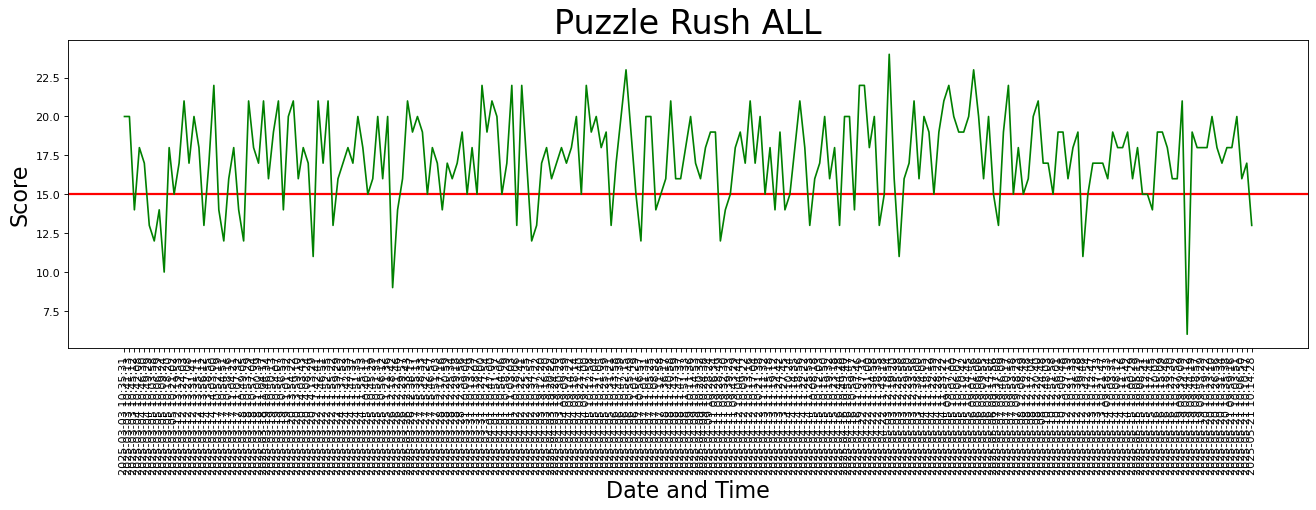

In [21]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(20, 5), dpi=80) # fig size

date_time = all_puzzle_rush['Timestamp'].tolist()
score = all_puzzle_rush['Score'].tolist()

# cosmetics
plt.title(f"Puzzle Rush ALL", fontsize=30)
plt.xlabel("Date and Time", fontsize=20)
plt.ylabel("Score", fontsize=20)
plt.xticks(rotation=90)

# draws one red line on y = 15 
plt.axhline(linewidth=2, color='r', y=15)

# data for the plot
plt.plot(date_time, score, color = 'g', linestyle = 'solid')

# I want to add time and errorless attempts 

plt.savefig('data/pics/puzzle_rush_ALL.png', bbox_inches='tight')
plt.show() 

In [10]:
print(all_puzzle_rush[['Score', 'Errors', 'TimeLeft']].describe())

            Score      Errors    TimeLeft
count  228.000000  228.000000  228.000000
mean    17.311404    2.315789   20.421053
std      2.863172    0.908266   27.087359
min      6.000000    0.000000    0.000000
25%     15.750000    2.000000    0.000000
50%     18.000000    3.000000    5.500000
75%     19.000000    3.000000   37.250000
max     24.000000    3.000000  108.000000


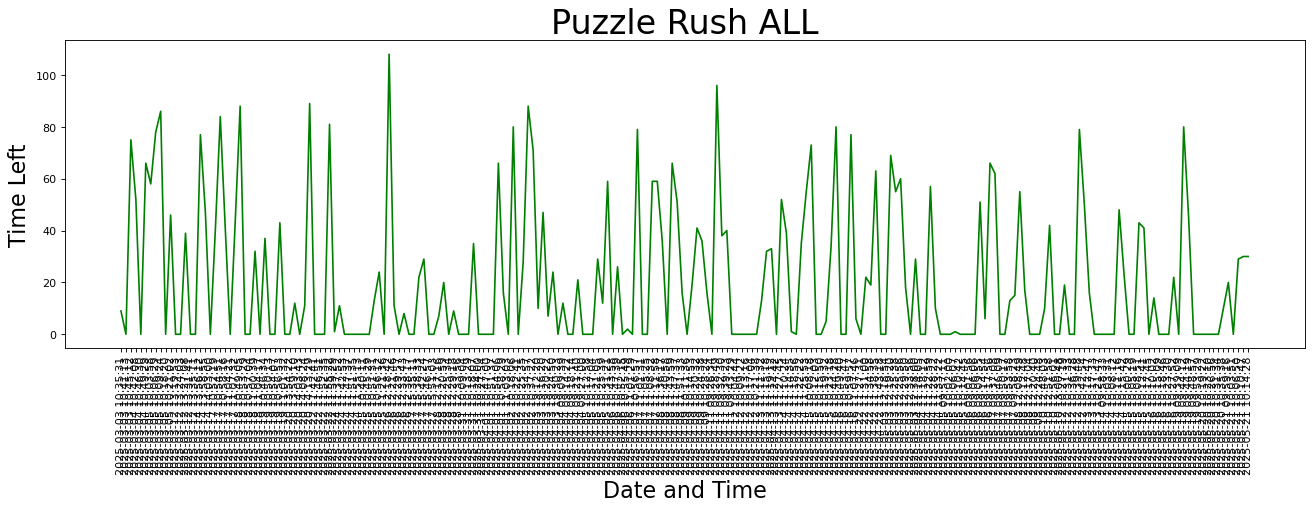

In [13]:
figure(figsize=(20, 5), dpi=80) # fig size

date_time = all_puzzle_rush['Timestamp'].tolist()
score = all_puzzle_rush['TimeLeft'].tolist()

# cosmetics
plt.title(f"Puzzle Rush ALL", fontsize=30)
plt.xlabel("Date and Time", fontsize=20)
plt.ylabel("Time Left", fontsize=20)
plt.xticks(rotation=90)

# data for the plot
plt.plot(date_time, score, color = 'g', linestyle = 'solid')

plt.show() 